<a href="https://colab.research.google.com/github/PLHPhuong/study-dataset/blob/main/Intermediate_Network_Analysis_in_Python_Note_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nxviz==0.6.2

In [ ]:
!wget https://raw.githubusercontent.com/PLHPhuong/study-dataset/main/Intermediate%20Network%20Analysis%20in%20Python/full.zip
!wget https://raw.githubusercontent.com/ptpuyen1511/lab-01-SNA/master/facebook_combined.txt

--2021-11-02 05:42:02--  https://raw.githubusercontent.com/PLHPhuong/study-dataset/main/Intermediate%20Network%20Analysis%20in%20Python/full.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 656363 (641K) [application/zip]
Saving to: ‘full.zip.2’

full.zip.2          100%[===================>] 640.98K  --.-KB/s    in 0.04s   

2021-11-02 05:42:03 (14.9 MB/s) - ‘full.zip.2’ saved [656363/656363]

--2021-11-02 05:42:03--  https://raw.githubusercontent.com/ptpuyen1511/lab-01-SNA/master/facebook_combined.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
!unzip "/content/full.zip"

Archive:  /content/full.zip
replace uci-forum.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: uci-forum.p             
replace uci.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: uci.csv                 
replace github.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: github.p                
replace American Revolution.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: American Revolution.txt  
replace Git-Nodes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Git-Nodes.csv           
replace Git-Edges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Git-Edges.csv           


In [ ]:
#import: networkx (abbr: nx), nxviz (abbr: nz), pyplot (abbr: plt), random
import networkx as nx
import nxviz as nz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import: CircosPlot, combinations, defaultdict
from itertools import combinations

# **Data extraction**


In [ ]:
GithubEdges = pd.read_csv('/content/Git-Edges.csv')
GithubNodes = pd.read_csv('/content/Git-Nodes.csv')
uci = pd.read_csv('/content/uci.csv')
#F= pd.read_csv("/content/facebook_combined.txt",sep='\s+',header=None)
#F = pd.DataFrame(F)
#F = nx.from_pandas_edgelist(df,0,1)

In [ ]:
GithubEdges = pd.DataFrame(GithubEdges)
GithubNodes = pd.DataFrame(GithubNodes)
GithubNodes.index = GithubNodes['node']
uci = pd.DataFrame(uci)
uci['date'] = pd.to_datetime(uci['date'])

In [ ]:
GIT = nx.from_pandas_edgelist(GithubEdges,'users','projects')
for i in sorted(GIT.nodes()):
    GIT.nodes[i]['bipartite'] = GithubNodes.bipartite[i]

df = pd.read_csv("/content/American Revolution.txt")
df = pd.DataFrame(df)
df.index = list(df['Unnamed: 0'])
data = []
for i in df:
  for j in df.index:
    if df[i][j] == 1:
      data.append([i,j])
data = pd.DataFrame(data, columns = ['n1', 'n2'])
AR = nx.from_pandas_edgelist(data,'n1','n2')

UCI = nx.from_pandas_edgelist(uci,'student','forum')

In [ ]:
print(len(GIT.nodes()),len(GIT.edges()))
print(len(UCI.nodes()),len(UCI.edges()))

22353 20000
627 814


# **Plotting using nxviz**
## Exercise
Plotting using nxviz
Now, you're going to practice creating a CircosPlot using nxviz! As a bonus preview of what's coming up in the next video, there's a little segment on the bipartite keyword in this exercise!

Here, the degree centrality score of each node has been added to their metadata dictionary for you using the following code:

Add the degree centrality score of each node to their metadata dictionary
> dcs = nx.degree_centrality(G)
<br> for n in G.nodes():
>>    G.nodes[n]['centrality'] = dcs[n]

If you want a refresher on degree centrality, check out the relevant video from the previous course - it is a way of computing the importance of a node!

CircosPlot has been pre-imported for you from nxviz, along with NetworkX (as nx) and matplotlib.pyplot (as plt).
## Instructions
Plot the network G using a circos plot. 
<br> To do this:
<br> - Create a CircosPlot object called c using the CircosPlot() function.
Use the node_color and node_grouping parameters of CircosPlot() to color and group the nodes by the keyword 'bipartite'
<br> - Use the node_order parameter of CircosPlot() to order the nodes by 'centrality'.
Draw c to the screen and display it.

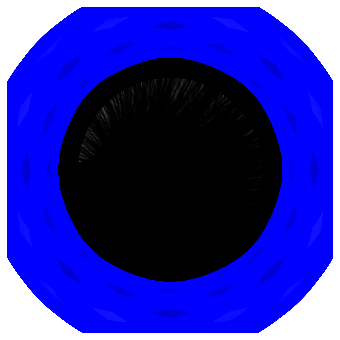

In [ ]:
# Create the CircosPlot object: c
c = nz.CircosPlot(GIT)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

# **The bipartite keyword**
## Exercise
In the video, Eric introduced you to the 'bipartite' keyword. This keyword is part of a node's metadata dictionary, and can be assigned both when you add a node and after the node is added. Remember, though, that by definition, in a bipartite graph, a node cannot be connected to another node in the same partition.

Here, you're going to write a function that returns the nodes from a given partition in a bipartite graph. In this case, the relevant partitions of the Github bipartite graph you'll be working with are 'projects' and 'users'.

## Instructions

*   Write a function called get_nodes_from_partition() which accepts two arguments - a bipartite graph G and a partition of G - and returns just the nodes from that partition.
> * Iterate over all the nodes of G (not including the metadata) using a for loop. 
> * Access the 'bipartite' keyword of the current node's metadata dictionary. If it equals partition, append the current node to the list nodes.

*   Use your get_nodes_from_partition() function together with the len() function to:
> * Print the number of nodes in the 'projects' partition of G. 
> * Print the number of nodes in the 'users' partition of G.

In [ ]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G,partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes
# Test: 
# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(GIT, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(GIT, 'users')))

11632
10721


# **Degree centrality distribution of user nodes**
## Exercise

In this exercise and the next one, you're going to do a final recap of material from the previous course. Your task is to plot the degree centrality distributions for each node partition in the bipartite version of the GitHub collaboration network. Here, you'll do this for the 'users' partition. In the next exercise, you'll do this for the 'projects' partition.
<br>
The function you wrote before get_nodes_from_partition(), has been loaded for you. Just to remind you, the "degree centrality" is a measure of node importance, and the "degree centrality distribution" is the list of degree centrality scores for all nodes in the graph. A few exercises ago, when you made the circos plot, we computed the degree centralities for you. You'll now practice doing this yourself!

## Instructions

* Import matplotlib.pyplot as plt.
* Use your get_nodes_from_partition() function from the previous exercise to get a list called user_nodes corresponding to the 'users' nodes of G.
* Using the nx.degree_centrality() function, compute the degree centralities for each node in G. Store the result as dcs.
* Use a list comprehension to compute the degree centralities for each node in user_nodes. Store the result as user_dcs.
> Remember, dcs is a dictionary, in which the keys are the nodes. The relevant nodes here are contained in user_nodes. How can you use this information to obtain the degree centralities of the user nodes? Use n as your iterator variable.
* Plot a histogram of the degree distribution of users, using plt.hist() and user_dcs.

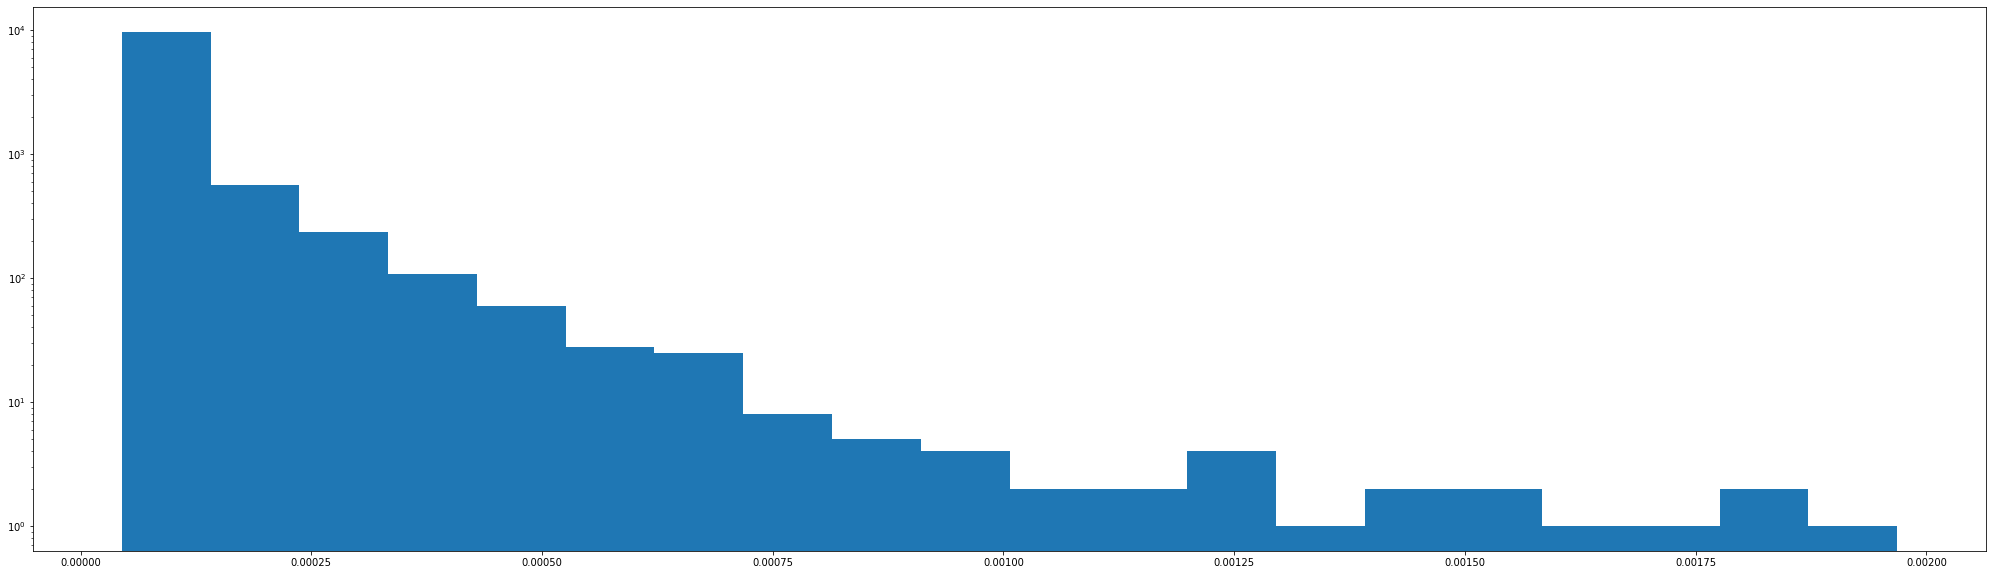

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(GIT,'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(GIT)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.figure(figsize=(35,10))
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()


# **Degree centrality distribution of project nodes**
## Exercise

Now it's time to plot the degree centrality distribution for the 'projects' partition of G. The steps to do this are exactly the same as in the previous exercise. For your convenience, matplotlib.pyplot has been pre-imported as plt.

Go for it!

## Instructions
* Obtain a list called project_nodes corresponding to the 'projects' nodes of G.
* Using the nx.degree_centrality() function, compute the degree centralities for each node in G. Store the result as dcs.
* Use a list comprehension to compute the degree centralities for each node in project_nodes. Store the result as project_dcs.
* Plot a histogram of the degree distribution of projects, using plt.hist() and project_dcs

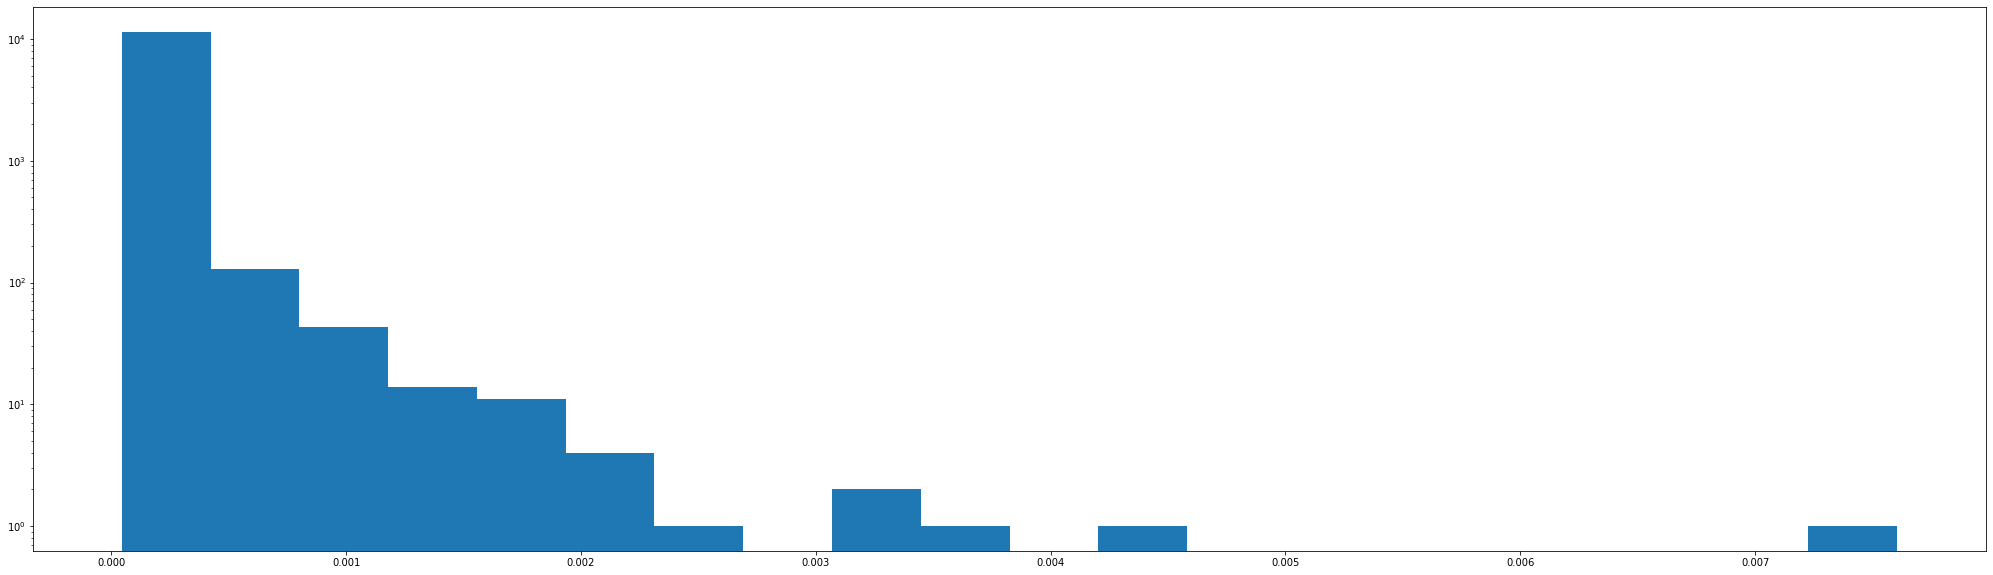

In [ ]:
# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(GIT,'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(GIT)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.figure(figsize=(35,10))
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()

# **Shared nodes in other partition**
# Exercise

In order to build up your concept of recommendation systems, we are going to start with the fundamentals. The focus here is on computing user similarity in bipartite graphs.

Your job is to write a function that takes in two nodes, and returns the set of repository nodes that are shared between the two user nodes.

You'll find the following methods and functions helpful in this exercise - .neighbors(), set(), and .intersection() - besides, of course, the shared_partition_nodes function that you will define!

## Instructions
* Write a function called shared_partition_nodes() that takes in 3 arguments - a graph G, node1, and node2 - and returns the set of nodes that are shared between node1 and node2.
* Check that node1 and node2 belong to the same partition using an assert statement and the 'bipartite' keyword.
> * Obtain the neighbors of node1 and store them as nbrs1.
> * Obtain the neighbors of node2 and store them as nbrs2.
> * Compute the overlap between nbrs1 and nbrs2 using the set .intersection() method.
* Print the number of shared repositories between users 'u7909' and 'u2148' using your shared_partition_nodes() function together with the len() function.

In [ ]:
def shared_partition_nodes(G,node1,node2):
    # Check that the nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(GIT,'u7909','u2148')))

1


# **User similarity metric**
## Exercise

Having written a function to calculate the set of nodes that are shared between two nodes, you're now going to write a function to compute a **metric of similarity** between two users: the number of projects shared between two users divided by the total number of nodes in the other partition. This can then be used to find users that are similar to one another.

## Instructions
* Complete the user_similarity() function to calculate the similarity between user1 and user2.
> * Use assert statements to check that user1 and user2 belong to the 'users' partition.
> * Use your shared_partition_nodes() function from the previous exercise to get the set of nodes shared between the two users user1 and user2.
> * Return the fraction of nodes in the projects partition. That is, divide the number of shared_nodes by the total number of nodes in the 'projects' partition.
* Compute the similarity score between users 'u4560' and 'u1880'. To do this:
> * First obtain the nodes in the 'projects' partition using your get_nodes_from_partition() function.
> * Then use your user_similarity() function to compute the score.

In [ ]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.nodes[user1]['bipartite'] == 'users'
    assert G.nodes[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G,user1,user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(G.nodes())

# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(GIT,'projects')
similarity_score = user_similarity(GIT,'u4560','u1880','projects')

print(similarity_score)

0.0


# **Find similar users**
## Exercise
You're now going to build upon what you've learned so far to write a function called most_similar_users() that finds the users most similar to another given user.

The beginnings of this function have been written for you. A list of nodes, user_nodes has been created, which contains all of the users except the given user that has been passed into the function. Your task is to complete the function such that it finds the users most similar to this given user. You'll make use of your user_similarity() function from the previous exercise to help do this.

A dictionary called similarities has been setup, in which the keys are the scores and the list of values are the nodes. If you've never seen a defaultdict before, don't worry - you'll learn more about it in Chapter 3! It functions exactly like a regular Python dictionary.

## Instructions
* Iterate over user_nodes and compute the similarity between user and each user_node (n) using your user_similarity() function. Store the result as similarity.
* Append the score and node to the similarities dictionary. The key is the score - similarity - and the value is the node - n.
* Compute the maximum similarity score. To do this, first access the keys (which contain the scores) of similarities using the .keys() method and then use the max() function. Store the result as max_similarity.
* Return the list of users that share maximal similarity. This list of users is the value of the max_similarity key of similarities.
* Use your most_similar_users() function to print the list of users most similar to the user 'u4560'.

In [ ]:
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.nodes[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, n, user, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

user_nodes = get_nodes_from_partition(GIT, 'users')
project_nodes = get_nodes_from_partition(GIT, 'projects')

print(most_similar_users(GIT, 'u4560', user_nodes, project_nodes))

['u5453', 'u17446']


# **Recommend repositories**
## Exercise

You're close to the end! Here, the task is to practice using set differences, and you'll apply it to recommending repositories from a second user that the first user should contribute to.

## Instructions
* Write a function called recommend_repositories() that accepts 3 arguments - G, from_user, and to_user - and returns the repositories that the from_user is connected to that the to_user is not connected to.
> * Get the set of repositories the from_user has contributed to and store it as from_repos. To do this, first obtain the neighbors of from_user and use the set() function on this.
> * Get the set of repositories the to_user has contributed to and store it as to_repos.
> * Using the .difference() method, return the repositories that the from_user is connected to that the to_user is not connected to.
* Print the repositories to be recommended **from** 'u7909' **to** 'u2148'.

In [ ]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

# Print the repositories to be recommended
print(recommend_repositories(GIT,'u7909','u2148'))

{'p12466', 'p405', 'p918', 'p15697', 'p8146'}


# **Reading graphs**
## Exercise

In this exercise, before you compute projections, you're going to practice working with one of NetworkX's disk I/O functions, read_edgelist(). read_edgelist() creates a graph from the edgelist file. The graph that you'll be working with is a bipartite graph describing the American Revolution. There are two node partitions - 'people' and 'clubs', and edges denote a person being a member of a club.

## Instructions
* Import networkx as nx.
* Use nx.read_edgelist() to read in 'american-revolution.edgelist'.
* In the dataset, 'clubs' do not have a . symbol in their node name. Use this information to assign nodes to 'clubs' or 'people' partitions. Remember the 'bipartite' keyword!
* Print the edges of the graph.

In [ ]:
# Import networkx
import networkx as nx

# Read in the data: g
# G = nx.read_edgelist('american-revolution.edgelist') -> AR
G = AR
# Assign nodes to 'clubs' or 'people' partitions
for n, d in G.nodes(data=True):
    if '.' in n:
        G.nodes[n]['bipartite'] = 'people'
    else:
        G.nodes[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(G.edges())

[('StAndrewsLodge', 'Ash.Gilbert'), ('StAndrewsLodge', 'Barrett.Samuel'), ('StAndrewsLodge', 'Bell.William'), ('StAndrewsLodge', 'Blake.Increase'), ('StAndrewsLodge', 'Bray.George'), ('StAndrewsLodge', 'Brown.Hugh'), ('StAndrewsLodge', 'Burbeck.Edward'), ('StAndrewsLodge', 'Burbeck.William'), ('StAndrewsLodge', 'Cailleteau.Edward'), ('StAndrewsLodge', 'Callendar.Elisha'), ('StAndrewsLodge', 'Chipman.Seth'), ('StAndrewsLodge', 'Collins.Ezra'), ('StAndrewsLodge', 'Crafts.Thomas'), ('StAndrewsLodge', 'Deshon.Moses'), ('StAndrewsLodge', 'Doyle.Peter'), ('StAndrewsLodge', 'Ferrell.Ambrose'), ('StAndrewsLodge', 'Flagg.Josiah'), ('StAndrewsLodge', 'Gould.William'), ('StAndrewsLodge', 'Graham.James'), ('StAndrewsLodge', 'Gray.Wait'), ('StAndrewsLodge', 'Ham.William'), ('StAndrewsLodge', 'Hitchborn.Nathaniel'), ('StAndrewsLodge', 'Hoffins.John'), ('StAndrewsLodge', 'Inglish.Alexander'), ('StAndrewsLodge', 'Jarvis.Edward'), ('StAndrewsLodge', 'Jefferds.Unknown'), ('StAndrewsLodge', 'Jenkins.John

# **Computing projection**
## Exercise
It's now time to try your hand at computing the projection of a bipartite graph to the nodes on one of its partitions. This will help you gain practice with converting between a bipartite version of a graph and its unipartite projections. Remember from the video that the "projection" of a graph onto one of its partitions is the connectivity of the nodes in that partition conditioned on connections to nodes on the other partition. Made more concretely, you can think of the "connectivity of customers based on shared purchases".

To help you get started, here's a hint on list comprehensions. List comprehensions can include conditions, so if you want to filter a graph for a certain type of node, you can do: [n for n, d in G.nodes(data=True) if d['key'] == 'some_value'].

## Instructions
* Prepare the people nodelist using a list comprehension. If the 'bipartite' keyword of a node n in G equals 'people', then that node should be part of the nodelist.
* Prepare the clubs nodelist by iterating over the nodes of G, including the metadata. Here, note that you have to check if the 'bipartite' keyword of the metadata dictionary d equals 'clubs'. Note: This is simply an alternate way of creating the nodelist. You do not have to iterate over the metadata - you can follow the same approach you used to create the people nodelist, simply checking for 'clubs' instead. We're asking you to use the other approach here so you get practice with both.
* Use nx.bipartite.projected_graph() to compute the people and clubs projections. Store the results as peopleG and clubsG.
> * This function takes in two arguments: The graph G, and the nodelist.

In [ ]:
# Prepare the nodelists needed for computing projections: people, clubs
# This exercise shows you two ways to do it, one with `data=True` and one without.
people = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G,people)
clubsG = nx.bipartite.projected_graph(G,clubs)


# **Plot degree centrality on projection**
## Exercise
Here, you're going to compare the degree centrality distributions for each of the following graphs: the original graph G, the people graph projection peopleG, and the clubs graph projection clubsG. This will reinforce the difference in degree centrality score computation between bipartite and unipartite versions of degree centrality metrics. The node lists people and clubs have been pre-loaded for you.

Recall from the video that the bipartite functions require passing in a container of nodes, but will return all degree centrality scores nonetheless. Remember also that degree centrality scores are stored as dictionaries (mapping node to score).

# Instructions
* Plot the degree centrality distribution of the original graph G, using the degree_centrality function from the bipartite module: nx.bipartite.degree_centrality(). It takes in two arguments: The graph G, and one of the node lists (people or clubs).
* Plot the degree centrality distribution of the peopleG graph, using the normal/non-bipartite degree_centrality function from NetworkX: nx.degree_centrality().
* Plot the degree centrality distribution of the clubsG graph, using the normal/non-bipartite degree_centrality function from NetworkX: nx.degree_centrality().

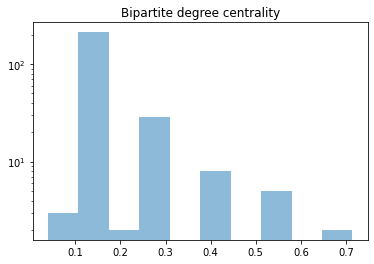

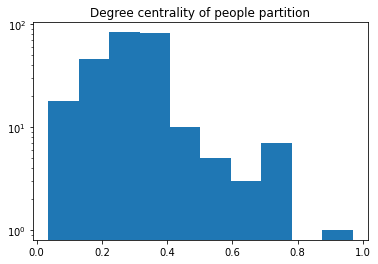

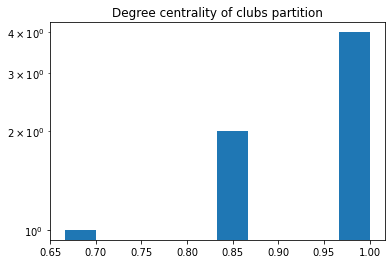

In [ ]:
# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G,people)
# Remember that you can directly plot dictionary values.
plt.hist(original_dc.values(), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(people_dc.values())
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(clubs_dc.values())
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()


# **Compute adjacency matrix**
## Exercise
Now, you'll get some practice using matrices and sparse matrix multiplication to compute projections! In this exercise, you'll use the matrix multiplication operator @ that was introduced in Python 3.5.

You'll continue working with the American Revolution graph. The two partitions of interest here are 'people' and 'clubs'.

## Instructions
* Get the list of people and list of clubs from the graph G using the get_nodes_from_partition() function that you defined in the previous chapter. This function accepts two parameters: A graph, and a partition.
* Compute the biadjacency matrix using nx.bipartite.biadjacency_matrix(), setting the row_order parameter to people_nodes and the column_order parameter to clubs_nodes. Remember to also pass in the graph G.
* Compute the user-user projection by multiplying (with the @ operator) the biadjacency matrix bi_matrix by its transposition, bi_matrix.T.

In [ ]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G,'people')
clubs_nodes = get_nodes_from_partition(G,'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix@bi_matrix.T

print(user_matrix)

  (0, 52)	1
  (0, 51)	1
  (0, 50)	1
  (0, 49)	1
  (0, 48)	1
  (0, 47)	1
  (0, 46)	1
  (0, 45)	1
  (0, 44)	1
  (0, 43)	1
  (0, 42)	1
  (0, 41)	1
  (0, 40)	1
  (0, 39)	1
  (0, 38)	1
  (0, 37)	1
  (0, 36)	1
  (0, 35)	1
  (0, 34)	1
  (0, 33)	1
  (0, 32)	1
  (0, 31)	1
  (0, 30)	1
  (0, 29)	1
  (0, 28)	1
  :	:
  (253, 215)	1
  (253, 211)	1
  (253, 210)	1
  (253, 209)	1
  (253, 208)	1
  (253, 144)	1
  (253, 119)	1
  (253, 112)	1
  (253, 101)	1
  (253, 100)	1
  (253, 99)	1
  (253, 95)	1
  (253, 81)	1
  (253, 80)	1
  (253, 77)	1
  (253, 75)	1
  (253, 73)	1
  (253, 66)	1
  (253, 62)	1
  (253, 55)	1
  (253, 54)	1
  (253, 53)	1
  (253, 47)	1
  (253, 41)	1
  (253, 1)	1


# **Find shared membership: Transposition**
## Exercise
As you may have observed, you lose the metadata from a graph when you go to a sparse matrix representation. You're now going to learn how to impute the metadata back so that you can learn more about shared membership.

The user_matrix you computed in the previous exercise has been preloaded into your workspace.

Here, the np.where() function will prove useful. This is what it does: given an array, say, a = [1, 5, 9, 5], if you want to get the indices where the value is equal to 5, you can use idxs = np.where(a == 5). This gives you back an array in a tuple, (array([1, 3]),). To access those indices, you would want to index into the tuple as idxs[0].

## Instructions
* Find out the names of people who were members of the most number of clubs.
> * To do this, first compute diag by using the .diagonal() method on user_matrix.
> * Then, using np.where(), select those indices where diag equals diag.max(). This returns a tuple: Make sure you access the relevant indices by indexing into the tuple with [0].
> * Iterate over indices and print out each index i of people_nodes using the provided print() function.
* Set the diagonal to zero and convert it to a "coordinate matrix format". This code has been provided for you in the answer.
* Find pairs of users who shared membership in the most number of clubs.
> * Using np.where(), access the indices where users_coo.data equals users_coo.data.max().
> * Iterate over indices2 and print out each index idx of people_node's users_coo.row and users_coo.col.

In [ ]:
# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal()
indices = np.where(diag == diag.max())[0]  
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices2 = np.where(users_coo.data == users_coo.data.max())[0]
print('People with most number of shared memberships:')
for idx in indices2:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]]))

Number of clubs: 5
People with the most number of memberships:
- Revere.Paul
- Warren.Joseph
People with most number of shared memberships:
- Revere.Paul, Warren.Joseph
- Warren.Joseph, Church.Benjamin
- Warren.Joseph, Adams.Samuel
- Warren.Joseph, Revere.Paul
- Bass.Henry, Chase.Thomas
- Chase.Thomas, Bass.Henry
- Adams.Samuel, Church.Benjamin
- Adams.Samuel, Warren.Joseph
- Church.Benjamin, Adams.Samuel
- Church.Benjamin, Warren.Joseph


# **Make nodelist**
## Exercise

You're now going to practice converting graphs to pandas representation. If you have taken any of DataCamp's pandas courses, you will know that there is a DataFrame.to_csv('filename.csv') method that lets you save it as a CSV file, which is a human-readable version. The main concept we hope you take away from here is the process of converting a graph to a list of records.

Start by re-familiarizing yourself with the graph data structure by calling G.nodes(data=True)[0] in the IPython Shell to examine one node in the graph.

## Instructions
* Initialize an empty node list called nodelist.
* Use a for loop to iterate over the nodes of the G_people. Inside the loop:
> * Update the nodeinfo dictionary using the .update() method with d as the argument.
> * Append the nodeinfo dictionary to nodelist.
* Create a pandas DataFrame of the nodelist called node_df using the pd.DataFrame() function.

In [ ]:
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())

NameError: ignored

# **Make nodelist**
## Exercise

You're now going to practice converting graphs to pandas representation. If you have taken any of DataCamp's pandas courses, you will know that there is a DataFrame.to_csv('filename.csv') method that lets you save it as a CSV file, which is a human-readable version. The main concept we hope you take away from here is the process of converting a graph to a list of records.

Start by re-familiarizing yourself with the graph data structure by calling G.nodes(data=True)[0] in the IPython Shell to examine one node in the graph.

## Instructions

* Initialize an empty node list called nodelist.
* Use a for loop to iterate over the nodes of the > * G_people. Inside the loop:
Update the nodeinfo dictionary using the .update() method with d as the argument.
> * Append the nodeinfo dictionary to nodelist.
* Create a pandas DataFrame of the nodelist called node_df using the pd.DataFrame() function.

In [ ]:
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())

# **Make edgelist**
## Exercise

Now, you're going to apply the same ideas to making an edge list. Go forth and give it a shot!

As with the previous exercise, run G.edges(data=True)[0] in the IPython Shell to get a feel for the edge list data structure before proceeding.

## Instructions
* Initialize a list called edgelist to store each edge as a record.
* Use a for loop to iterate over the edges of G_people. Inside the loop:
> * Initialize a dictionary called edgeinfo that shows edge information.
> * Update the edgeinfo dictionary with the metadata dictionary d.
> * Append the edgeinfo dictionary to edgelist.
* Create a pandas DataFrame of the edgelist called edge_df.

In [ ]:
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())

# **List of graphs**
## Exercise

In this set of exercises, you'll use a college messaging dataset to learn how to filter graphs for time series analysis. In this dataset, nodes are students, and edges denote messages being sent from one student to another. The graph as it stands right now captures all communications at all time points.

Let's start by analyzing the graphs in which only the edges change over time.

The dataset has been loaded into a DataFrame called data. Feel free to explore it in the IPython Shell. Specifically, check out the output of data['sender'] and data['recipient'].

## Instructions
* Initialize an empty list called Gs.
* Use a for loop to iterate over months. Inside the loop:
> * Instantiate a new undirected graph called G, using the nx.Graph() function.
> * Add in all nodes that have ever shown up to the graph. To do this, use the .add_nodes_from() method on G two times, first with data['sender'] as argument, and then with data['recipient'].
> * Filter the DataFrame so there's only the given month. This has been done for you.
> * Add edges from the filtered DataFrame. To do this, use the .add_edges_from() method with df_filtered['sender'] and df_filtered['recipient'] passed into zip().
> * Append G to the list of graphs Gs.

In [ ]:
# import networkx as nx 

months = range(4, 11)

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'],df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))

KeyError: ignored

# **Graph differences over time**
# Exercise

Now, you'll compute the graph differences over time! To look at the simplest case, here you'll use a window of (month, month + 1), and then keep track of the edges gained or lost over time. This exercise is preparation for the next exercise, in which you will visualize the changes over time.

# Instructions
* Inside the for loop:
> * Assign Gs[i] to g1 and Gs[i + window] to g2.
> * Using nx.difference() compute the difference between g2 and g1. Append the result to added.
> * Append the difference between g1 and g2 to removed.
* Print fractional_changes.

In [ ]:
# import networkx as nx  
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2,g1))   
    removed.append(nx.difference(g1,g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)

# **Plot number of edge changes over time**
## Exercise
You're now going to make some plots! All of the lists that you've created before have been loaded for you in this exercise too. Do not worry about some of the fancy matplotlib code that shows up below: there are comments to help you understand what's going on.

## Instructions
* Plot the number of edges added over time. To do this:
> * Use a list comprehension to iterate over added and create a list called edges_added. The output expression of the list comprehension is len(g.edges()), where g is your iterator variable.
> * Pass in the edges_added list to ax1.plot().
* Plot the number of edges removed over time. Once again, use a list comprehension, this time iterating over removed instead of added.
Plot the fractional changes over time by passing it in as an argument to ax2.plot().

NameError: ignored

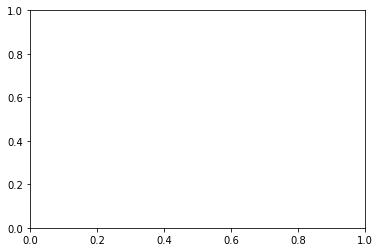

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show()

# **Number of edges over time**
## Exercise
You're now going to get some practice plotting other evolving graph statistics. We'll start with a simpler exercise to kick things off. First off, plot the number of edges over time.

To do this, you'll create a list of the number of edges per month. The index of this list will correspond to the months elapsed since the first month.
## Instructions
* Import matplotlib.pyplot as plt.
* Create a list of the number of edges per month called edge_sizes. Use a list comprehension to do this, where you iterate over Gs using an iterator variable called g, and your output expression is len(g.edges()).
* Plot edge sizes over time.

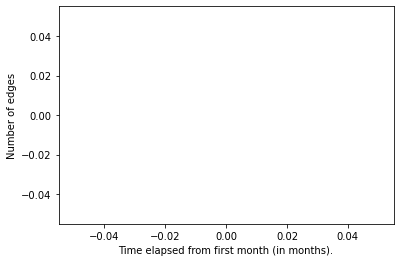

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show() 

# **Degree centrality over time**
## Exercise

Now, you're going to plot the degree centrality distribution over time. Remember that the ECDF function will be provided, so you won't have to implement it.

## Instructions
* Create a list of degree centrality scores month-by-month. To do this:
> * In each iteration of the first for loop, compute the degree centrality of G using the nx.degree_centrality() function. Save the result as cent.
> * Append cent to the list cents.
* Plot ECDFs over time. To do this:
> * Iterate over range(len(cents)) using a for loop. Inside the loop, use the ECDF() function with cents[i].values() as the argument. Unpack the output of this into x and y.
> * Pass x and y as arguments to plt.plot().

In [ ]:
# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)


# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ECDF(cents[i].values())
    plt.plot(x, y, label='Month {0}'.format(i+1)) 
plt.legend()   
plt.show()

# **Find nodes with top degree centralities**
## Exercise

In this exercise, you'll take a deeper dive to see whether there's anything interesting about the most connected students in the network. First off, you'll find the cluster of students that have the highest degree centralities. This result will be saved for the next plotting exercise.

## Instructions
* Get the top 5 unique degree centrality scores. To do this, use the sorted() function, in which the first argument is the set of degree centrality values of G (because you want unique degree centralities), and the second argument is reverse=True, to ensure that it is sorted in descending order. To limit the results to the top 5 scores, add in appropriate slicing to the end of the statement. Also, remember to use .values() on the returned degree centrality results!
* Create list of nodes that have the top 5 highest overall degree centralities. To do this:
> * Iterate over the dictionary of degree centrality scores using the .items() method on nx.degree_centrality(G).
> * If dc is in top_dcs, then append the node n to the top_connected list.
* Print the number of nodes that share the top 5 degree centrality scores (top_connected) using len().

In [ ]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[0:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

# **Visualizing connectivity**
## Exercise

Here, you're going to visualize how the connectivity of the top connected nodes changes over time. The list of top connected values, top_connected, from the previous exercise has been loaded.

Remember the defaultdict you used in Chapter 1? You'll use another defaultdict in this exercise! As Eric mentioned in the video, a defaultdict is preferred here as a regular Python dictionary would throw a KeyError if you try to get an item with a key that is not currently in the dictionary.

This exercise will make use of nested for loops. That is, you'll use one for loop inside another.

## Instructions
* Initialize a defaultdict of empty lists called connectivity.
* Iterate over top_connected using a for loop, and in the body of this outer for loop, once again iterate over Gs. Inside this nested loop:
> * The keys of connectivity should be the nodes n in top_connected, and the values should be the list of connectivity scores. Therefore, you have to append len(g.neighbors(n)) to connectivity[n].
* Iterate over connectivity using .items() and plot the connectivity of each node by passing in conn to plt.plot().

In [ ]:
# # Import necessary modules
# import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(list(g.neighbors(n))))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items(): 
    plt.plot(conn, label=n) 
plt.legend()  
plt.show()


# **Create a graph from the pandas DataFrame**
## Exercise
Let's start by creating a graph from a pandas DataFrame. In this exercise, you'll create a new bipartite graph by looping over the edgelist (which is a DataFrame object).

For simplicity's sake, in this graph construction procedure, any edge between a student and a forum node will be the 'last' edge (in time) that a student posted to a forum over the entire time span of the dataset, though there are ways to get around this.

Additionally, to shorten the runtime of the exercise, we have provided a sub-sampled version of the edge list as data. Explore it in the IPython Shell to familiarize yourself with it.

## Instructions
* Instantiate a new Graph called G.
* Add nodes from each of the partitions. Use the .add_nodes_from() method to do this. The two partitions are 'student' and 'forum'. To add nodes from the 'student' partition, for example, the arguments to .add_nodes_from() would be data['student'] and bipartite='student'.
* Add in each edge along with the date the edge was created. To do this, use the .add_edge() method inside the loop, with the arguments d['student'], d['forum'], and date=d['date'].

In [ ]:
# import networkx as nx

# Instantiate a new Graph: G
G = nx.Graph()
# Add nodes from each of the partitions
G.add_nodes_from(uci['student'],bipartite='student')
G.add_nodes_from(uci['forum'],bipartite='forum')

# Add in each edge along with the date the edge was created
for r, d in uci.iterrows():
    G.add_edge(d['student'],d['forum'],date=d['date'])

# **Visualize the degree centrality distribution of the students projection**
## Exercise

In this exercise, you will visualize the degree centrality distribution of the students projection. This is a recap of two previous concepts you've learned: degree centralities, and projections.

## Instructions
* Get the nodes of the 'student' partition into a list called student_nodes.
> * Use a list comprehension to do this, iterating over all the nodes of G (including the metadata), and checking to see if the 'bipartite' keyword of d equals 'student'.
* Create the students nodes projection as a graph called G_students. Use the nx.bipartite.projected_graph() function to do this. Be sure to specify the keyword argument nodes=student_nodes.
* Calculate the degree centrality of G_students using nx.degree_centrality(). Store the result as dcs.
* Plot the histogram of degree centrality values.

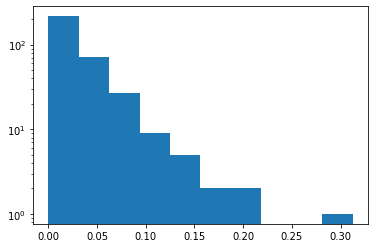

In [ ]:
# Import necessary modules
# import matplotlib.pyplot as plt
# import networkx as nx

# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data = True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G,student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show() 

# **Visualize the degree centrality**
## Exercise
distribution of the forums projection
This exercise is also to reinforce the concepts of degree centrality and projections. This time round, you'll plot the degree centrality distribution for the 'forum' projection. Follow the same steps as in the previous exercise!

## Instructions
* Get the nodes of the 'forum' partition into a list called forum_nodes.
* Create the forums nodes projection as a graph called G_forum.
* Calculate the degree centrality of G_forum using nx.degree_centrality(). Store the result as dcs.
* Plot the histogram of degree centrality values.

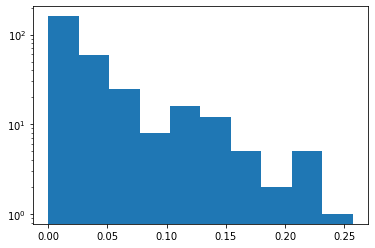

In [ ]:
# Import necessary modules
# import matplotlib.pyplot as plt 
# import networkx as nx

# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G,forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show()

# **Time filter on edges**
## Exercise
You're now going to practice filtering the graph using a conditional as applied to the edges. This will help you gain practice and become comfortable with list comprehensions that contain conditionals.

To help you with the exercises, remember that you can import datetime objects from the datetime module. On the graph, the metadata has a date key that is paired with a datetime object as a value.

## Instructions
* Instantiate a new graph called G_sub.
* Add nodes from the original graph (including the node metadata), using the .add_nodes_from() method.
* Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16. To do this:
> * Use the .add_edges_from() method with a list comprehension as the argument.
> * The output expression of the list comprehension is (u, v, d). Iterate over all the edges of G and check whether d['date'] is less than datetime(2004, 5, 16).

In [ ]:
# import networkx as nx
from datetime import datetime

# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data = True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004, 5, 16)])

# **Visualize filtered graph using nxviz**
## Exercise
Here, you'll visualize the filtered graph using a CircosPlot. The CircosPlot is a natural choice for this visualization, as you can use node grouping and coloring to visualize the partitions, while the circular layout preserves the aesthetics of the visualization.

## Instructions
* Compute degree centrality scores of each node using the bipartite module degree centralities, but based on the degree centrality in the original graph.
> * Use the nx.bipartite.degree_centrality() function for this, with the arguments G and nodes=forum_nodes.
* Create a new CircosPlot object with nodes colored and grouped (parameters node_color and node_grouping) by their partition label ('bipartite'), and ordered (parameter node_order) by their degree centrality ('dc')
* Plot the CircosPlot to screen.

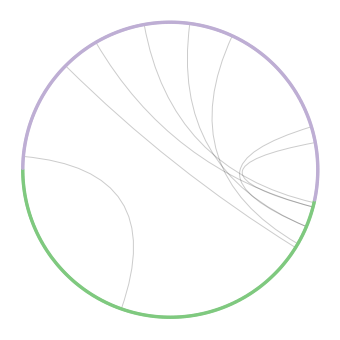

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
# import networkx as nx
# import matplotlib.pyplot as plt

# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.nodes[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub,node_color='bipartite',node_grouping='bipartite',node_order='dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show() 


# **Plot number of posts being made over time**
## Exercise
Let's recap how you can plot evolving graph statistics from the graph data. First off, you will use the graph data to quantify the number of edges that show up within a chunking time window of td days, which is 2 days in the exercise below.

The datetime variables dayone and lastday have been provided for you.

## Instructions
* Define a timedelta of 2 days using the timedelta() function and specifying an argument for the days parameter.
* Inside the while loop:
> * Filter edges such that they are within the sliding time window. Use a list comprehension to do this, where the output expression is (u, v, d), the iterable is G.edges(data=True), and there are two conditions: if d['date'] is >= curr_day and < than curr_day + td.
> * Append the number of edges (use the len() function to help you calculate this) to n_posts.
> * Increment curr_day by the time delta td.
* Make a plot of n_posts using plt.plot().

In [ ]:
dayone = datetime(2004,5,14)
lastday = datetime(2004,10,26 )

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


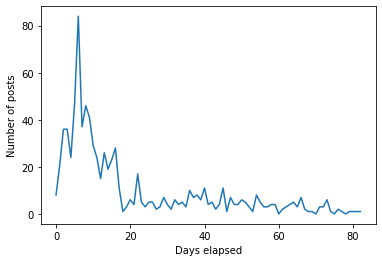

In [ ]:
# Import necessary modules
from datetime import timedelta  
# import matplotlib.pyplot as plt

# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
# Create the plot
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()  

# **Extract the mean degree centrality**
## Exercise
Here, you're going to see if the mean degree centrality over all nodes is correlated with the number of edges that are plotted over time. There might not necessarily be a strong correlation, and you'll take a look to see if that's the case.
## Instructions
* Instantiate a new graph called G_sub containing a subset of edges.
* Add nodes from G, including the node metadata.
* Add in edges that fulfill the criteria, using the .add_edges_from() method.
* Get the students projection G_student_sub from G_sub using the nx.bipartite.projected_graph() function.
* Compute the degree centrality of the students projection using nx.degree_centrality() (don't use the bipartite version).
* Append the mean degree centrality to the list mean_dcs. Be sure to convert dc.values() to a list first.
* Hit 'Submit Answer' to view the plot!

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


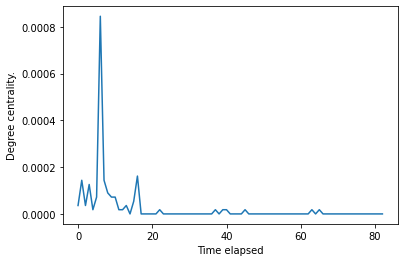

In [ ]:
from datetime import datetime, timedelta
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub,nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()


# **Find the most popular forums day-by-day: I**
## Exercise
Great stuff! You're onto the final two exercises - which are really just one long exercise. These will be a good memory workout for your Python programming skills!

We're going to see how many forums took the title of "the most popular forum" on any given time window.

## Instructions
* Instantiate a list to hold the list of most popular forums by day called most_popular_forums.
* Instantiate a list to hold the degree centrality scores of the most popular forums called highest_dcs.
* Instantiate new graph called G_sub and add in the nodes from the original graph G using the .add_nodes_from() method.
* Add in edges from the original graph G that fulfill the criteria (which are exactly the same as in the previous exercise).

In [ ]:
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

# Instantiate a list to hold the list of most popular forums by day: most_popular_forums
most_popular_forums = []
# Instantiate a list to hold the degree centrality scores of the most popular forums: highest_dcs
highest_dcs = []
curr_day = dayone
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1: 
        print(curr_day) 
    # Instantiate new graph: G_sub
    G_sub = nx.Graph()
    
    # Add in nodes from original graph G
    G_sub.add_nodes_from(G.nodes(data=True))
    
    # Add in edges from the original graph G that fulfill the criteria
    G_sub.add_edges_from([(u,v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # CODE CONTINUES ON NEXT EXERCISE
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


# **Find the most popular forums day-by-day: II**
## Exercise
Great work with the previous exercise - you had written code that created the time-series graph list. Now, you're going to finish that exercise - that is, you'll find out how many forums had the most popular forum score on a per-day basis!

One of the things you will be doing here is a "dictionary comprehension" to filter a dictionary. It is very similar to a list comprehension to filter a list, except the syntax looks like: {key: val for key, val in dict.items() if ...}. Keep that in mind!

## Instructions
* Get the degree centrality using nx.bipartite.degree_centrality(), with G_sub and forum_nodes as arguments.
* Filter the dictionary such that there's only forum degree centralities. The key: val pair in the output expression should be n, dc. Iterate over dc.items() and check if n is in forum_nodes.
* Identify the most popular forum(s) - should be of highest degree centrality (max(forum_dcs.values())) and its DC value should not be zero.
* Append the highest dc values to highest_dcs.
* Create the plots!
> * Use a list comprehension for the first plot, in which you iterate over most_popular_forums (which is a list of lists) using forums as your iterator variable. The output expression should be the number of most popular forums, calculated using len().
> * For the second plot, use highest_dcs and plt.plot() to visualize the top degree centrality score.

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


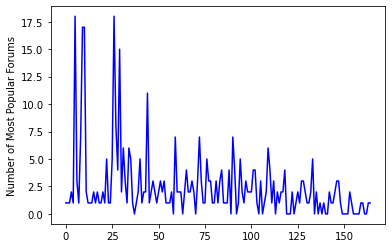

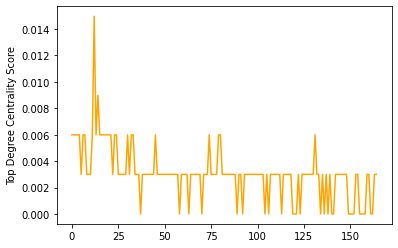

In [ ]:
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub,forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()
